# 使用手册
## 功能介绍

全外显子测序分析流程，可以基因组中的生殖细胞变异。
WES workspace包含1个工作流，是进行外显子重测序分析的生物信息学流程，主要分析测序样本的SNP和INDel等情况。工作流需要输入二代测序的双末端数据（例如illumina），人类基因组参考。输入所需数据后经生物信息学分析对目标样本进行变异检测，最终得到目标样本的SNP和INDel结果。分析过程中的关键中间文件均可以输出。

本流程基于Sentieon加速软件搭建。Sentieon是一款软件套件，提供了与GATK兼容的工具，旨在提高基因组数据分析的速度和效率。Sentieon的工具可以用于替代GATK的某些步骤，而无需改变GATK的工作流程。它的主要优势是计算速度更快，同时保持与GATK相同的分析结果质量。

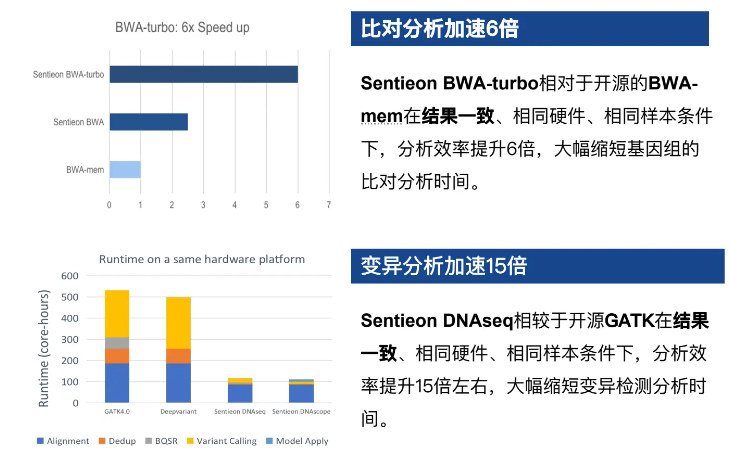


<br>
以下是使用Sentieon进行体细胞（germline）变异检测的一般流程，这个流程是GATK的加速版：

1. **数据预处理**：
   - **质量控制**：对原始的FASTQ文件进行质量评估。
   - **Reads剪辑**：去除接头序列以及低质量的reads端部。
   - **比对到参考基因组**：使用Sentieon的比对工具（如Sentieon BWA）将reads比对到参考基因组。

2. **排序和标记重复**：
   - 对比对后的文件（BAM文件）进行排序。
   - 使用Sentieon的`LocusCollector`和`Dedup`工具来标记和删除重复的reads。

3. **局部重排**：
   - 使用Sentieon的`Realigner`工具对BAM文件中的INDEL区域进行局部重排，以优化比对质量。

4. **质量校正**：
   - 使用Sentieon的`QualCal`工具进行基础质量分数校正（BQSR）。

5. **变异检测**：
   - 使用Sentieon的`Haplotyper`工具进行SNP和INDEL的变异检测，这一步骤类似于GATK的`HaplotypeCaller`。

6. **变异过滤**：
   - 使用Sentieon的`VariantFiltration`工具对变异进行过滤，去除低质量和不可靠的变异。

工作流分析流程图如下所示：

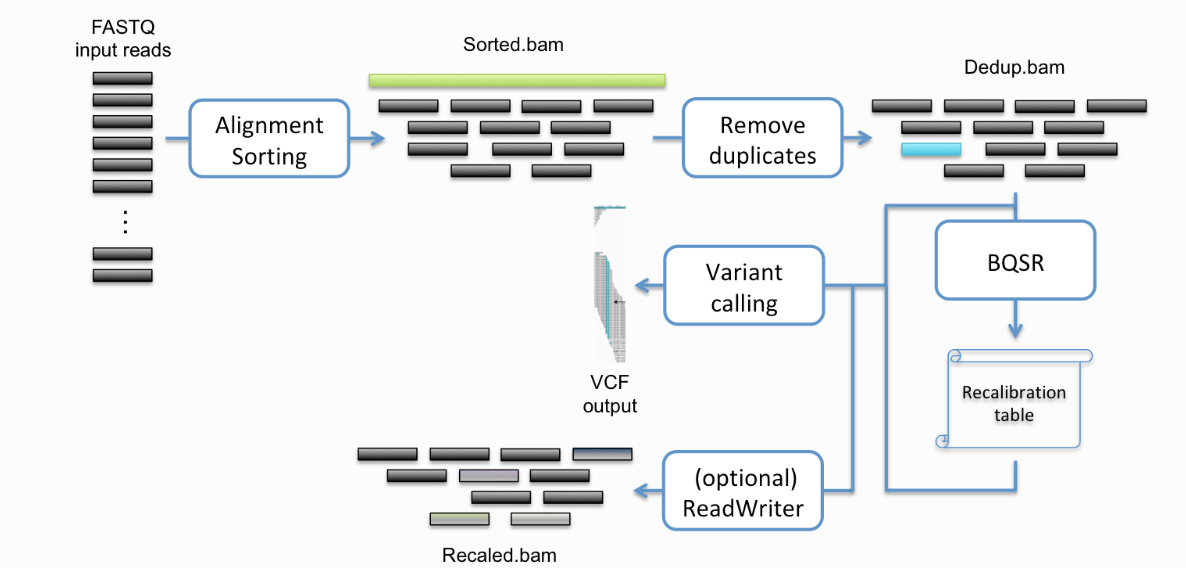

# 使用指南

下边将使用测试数据进行使用说明：

1、在“工作流”中找到WES流程，并点击
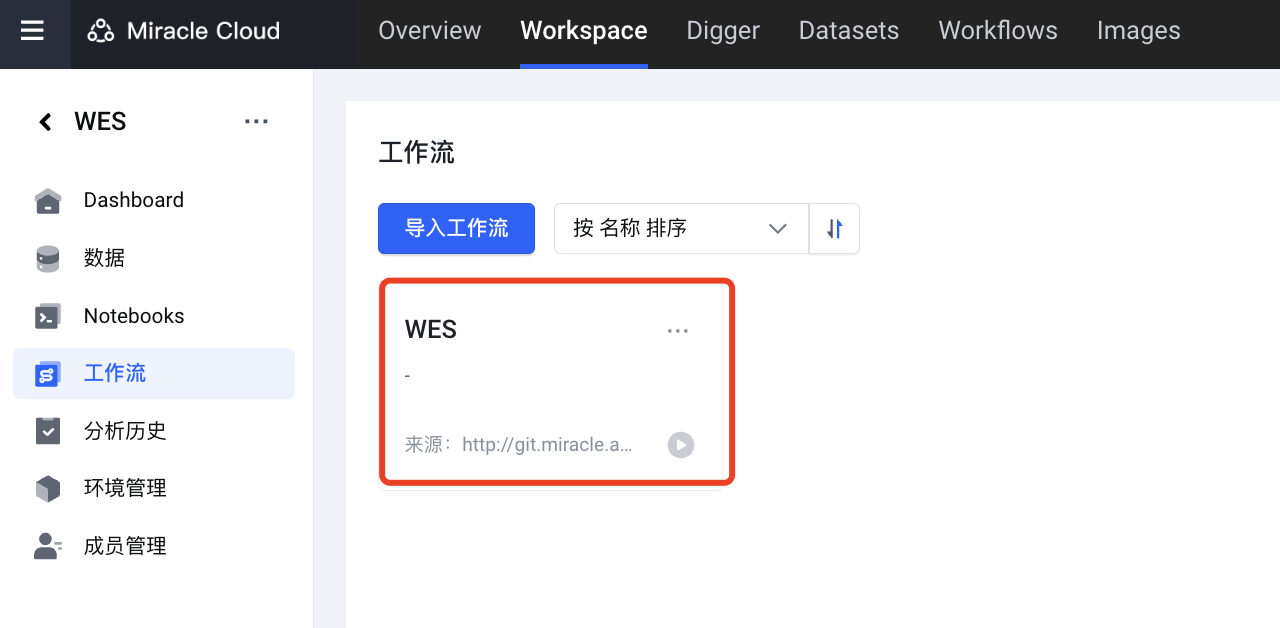

2、选择需要分析的数据实体，如果需要使用自己的数据，则需要上传数据以及制作数据实体模型并上传到本Workspaces，具体操作可以参考最佳实践-使用GATK进行基因组分析的“上传数据”部分。

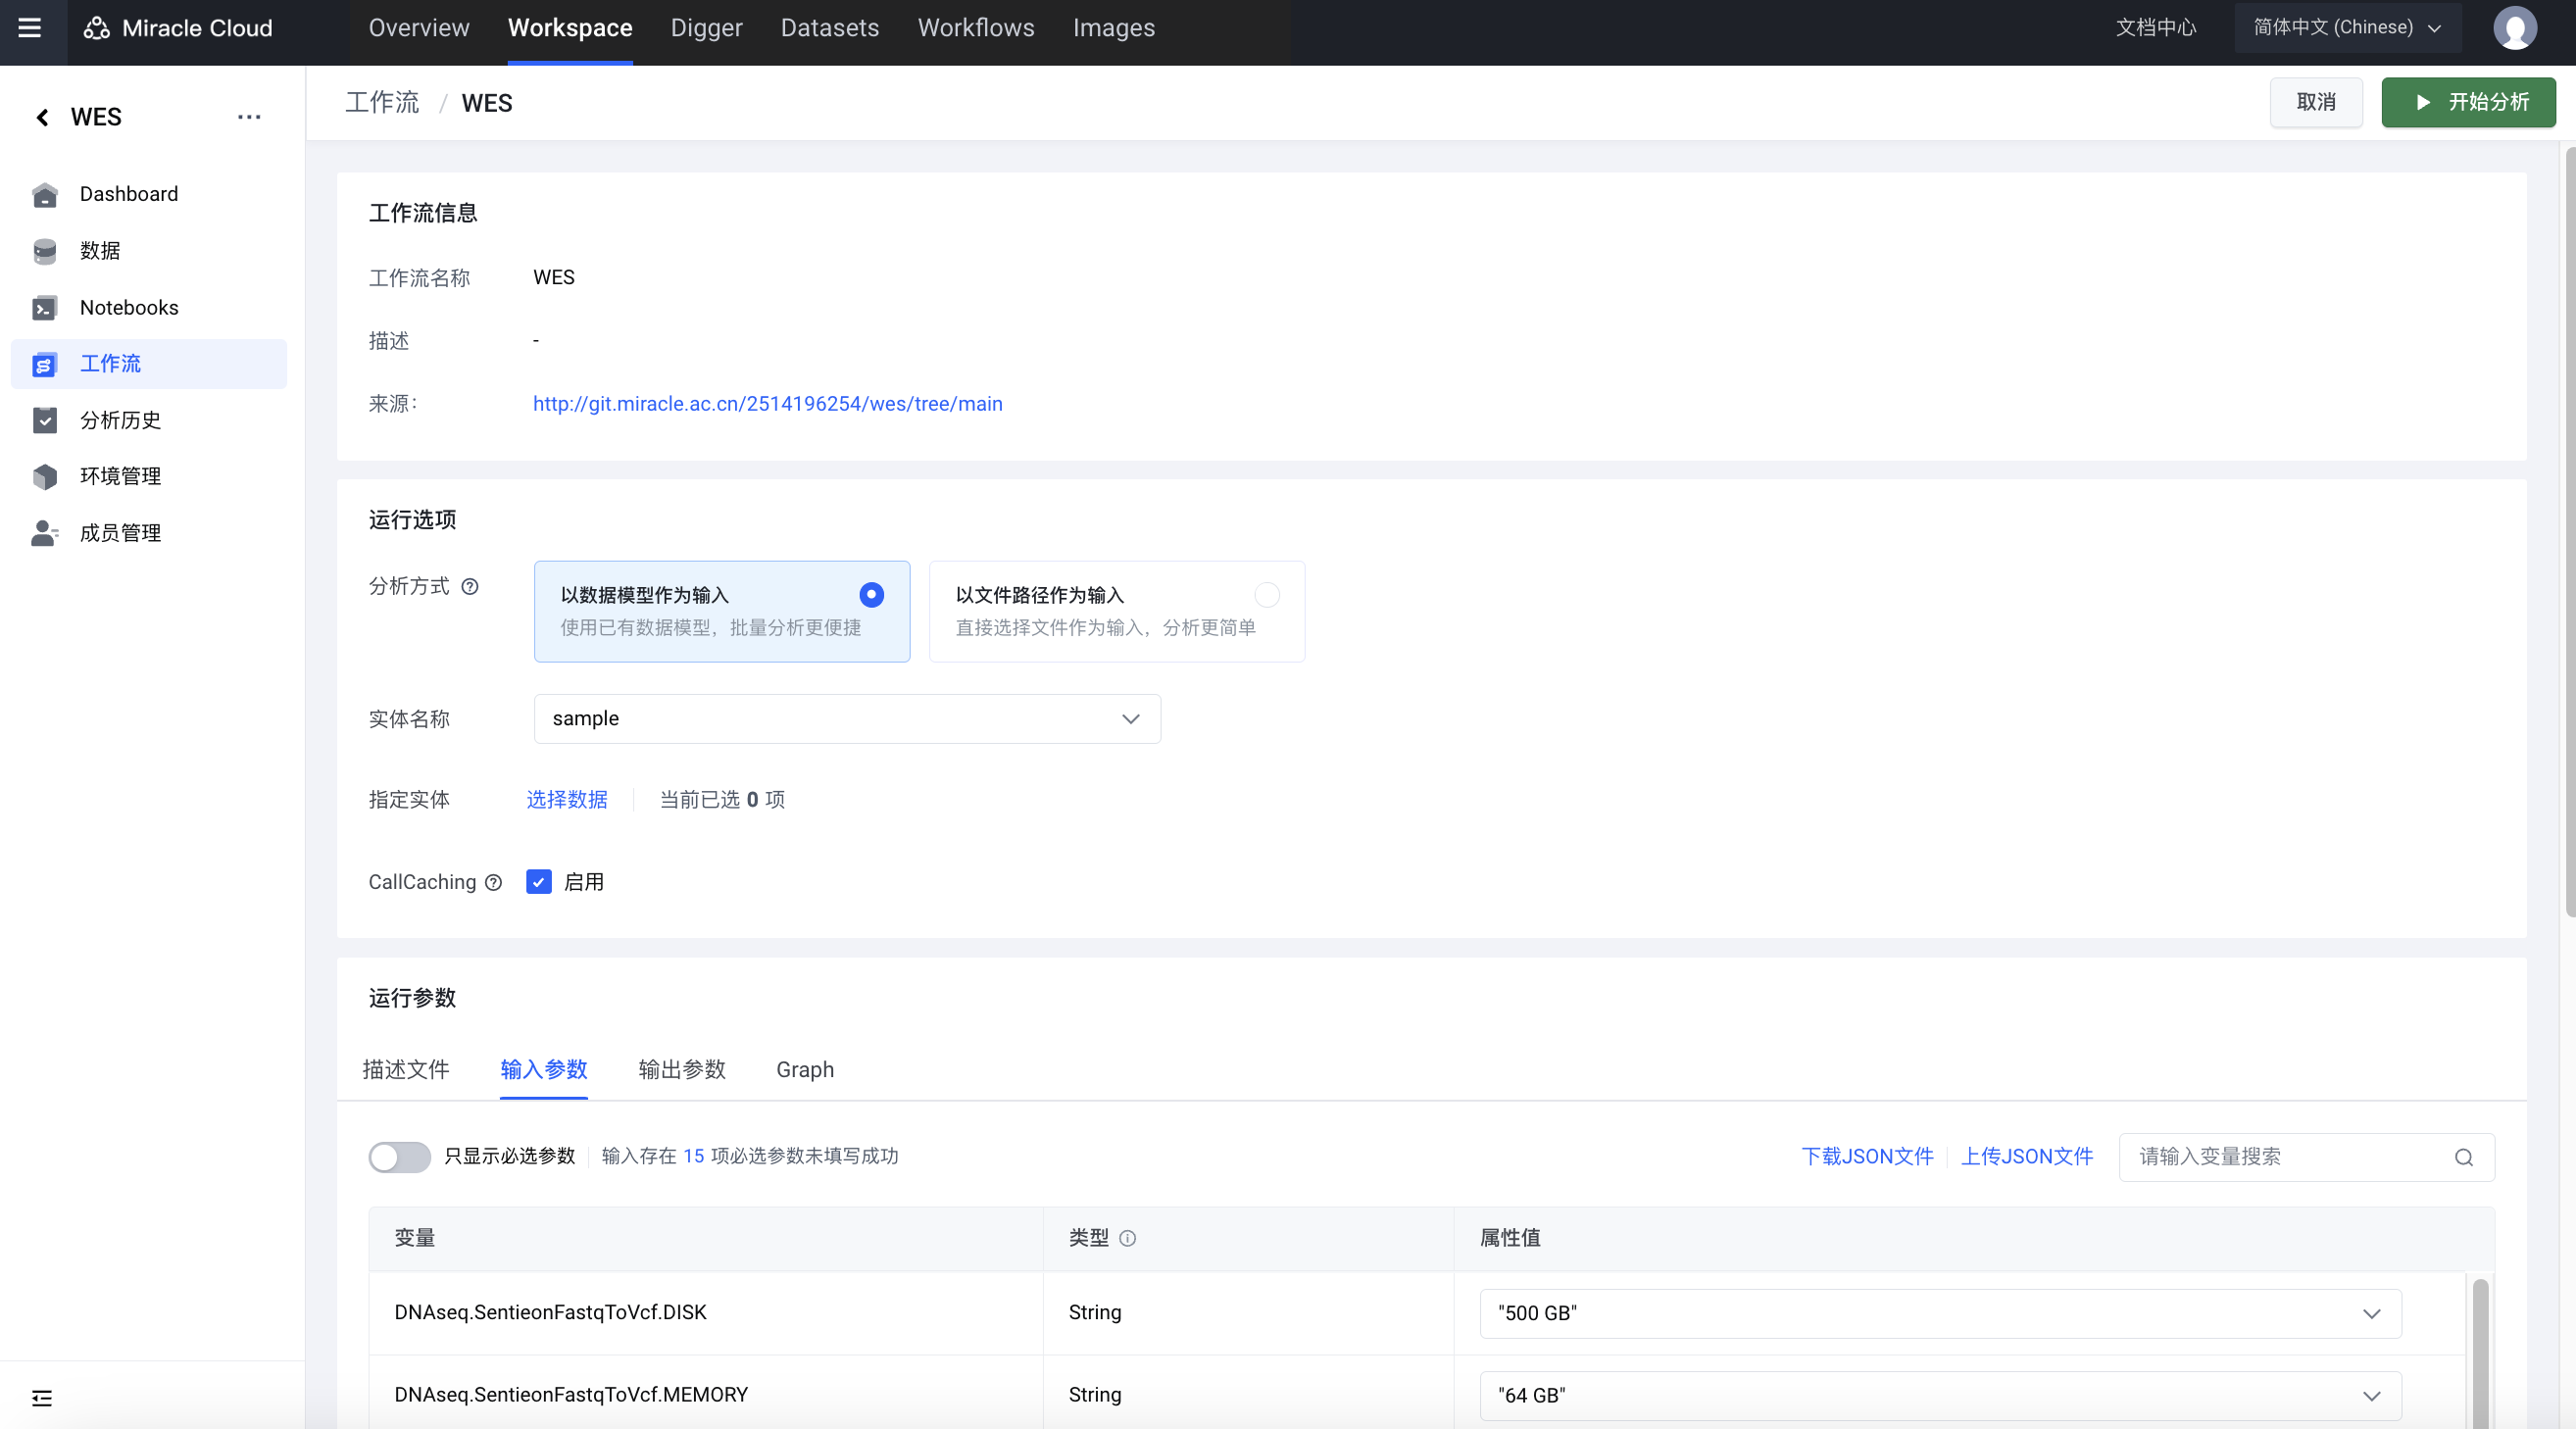

3、选择需要分析的数据，这里以双端测序数据“18C054744”为例。
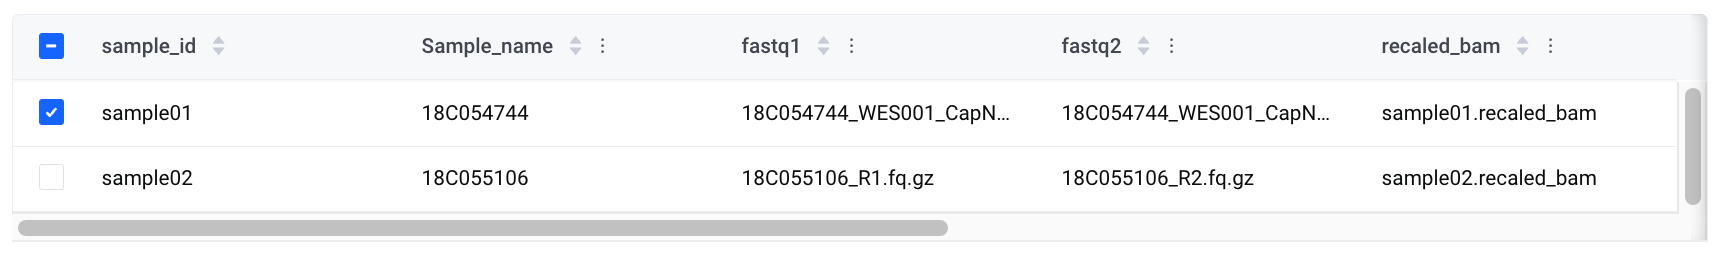

### 参数填写说明
#### 输入文件与参数

adapter: adapter序列文件

fastq1：双末端文件fq1

fastq2：双末端文件fq2

bqsr_vcfs:参考基因组的bqsr

dbsnp_vcf:参考基因组的dbsnp文件

gotc_docker:docker镜像，请使用"registry-vpc.miracle.ac.cn/gznl/wes_new"

interval:外显子区域interval文件

model:SentieonModelBeta0.5.model模型文件

ref_fasta:人类基因组文件

ref_fasta_indexes:人类基因组相关配置文件

sample_name:样本名

sentieon_license_server:sentieon license文件，请联系管理员获取

threads：软件使用线程数

DISK：申请硬盘大小

MEMORY：申请内存大小

NUM_THREAD：申请线程


## 结果文件


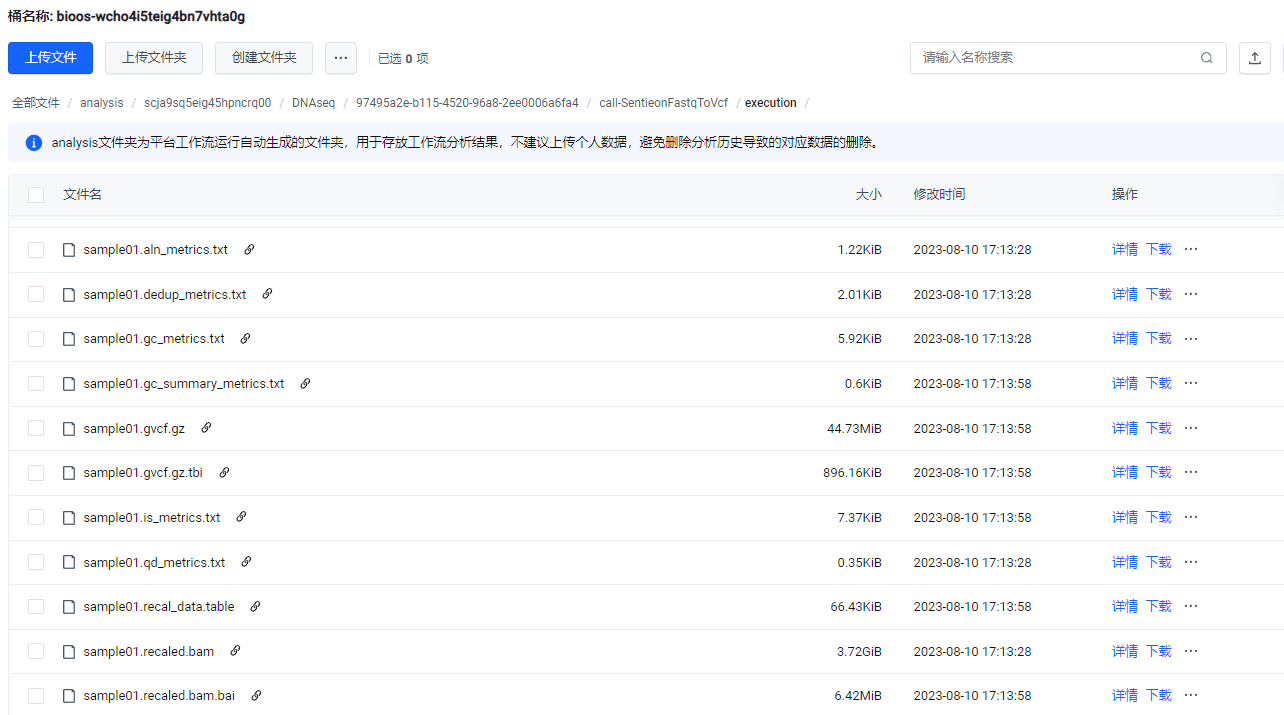

主要关注gvcf文件，该文件记录变异和非变异位置的测序信息。

### 示例
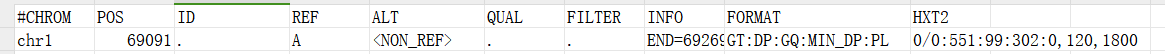


第一列：染色体 <br>
第二列：位置<br>
第三列：ID<br>
第四列：参考基因组碱基<br>
第五列：重测序碱基<br>
第六列：测序质量<br>
第七列：过滤结果<br>
第八列：信息<br>
第九列：格式<br>
第十列：对应FORMAT的相关信息<br>